# **Stroke Prediction**

### **Importing the libraries** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **Data Pre Processing**

### **Checking of Null values**

In [ ]:
df.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### **Treating Null values**

In [ ]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### **Data Analysis**

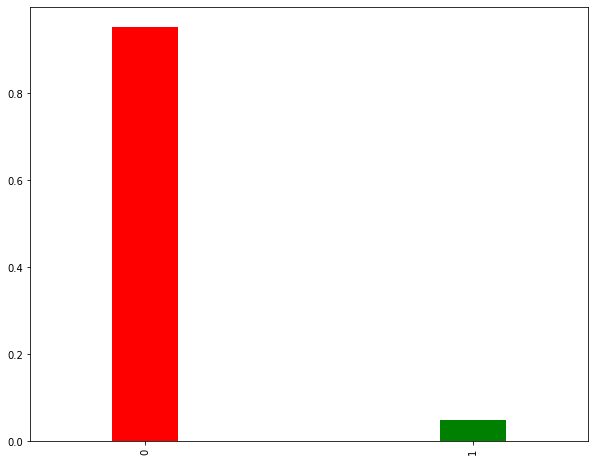

In [ ]:
fig,axes=plt.subplots(figsize=(10,8))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2,color=('red','green'))

plt.show()

### **Categorical columns**

In [ ]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

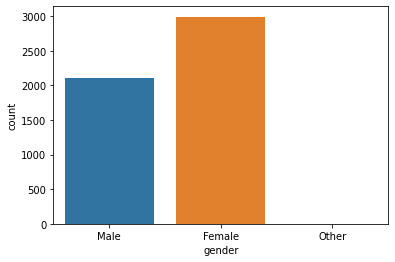

In [ ]:
sns.countplot(df['gender'])

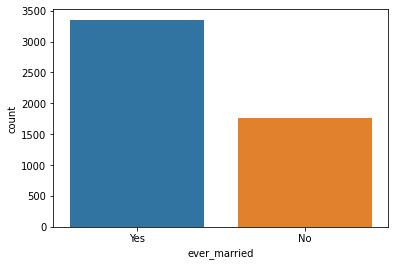

In [ ]:
sns.countplot(df['ever_married'])

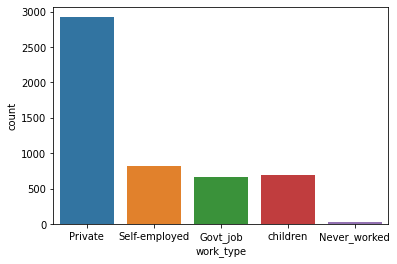

In [ ]:
sns.countplot(df['work_type'])

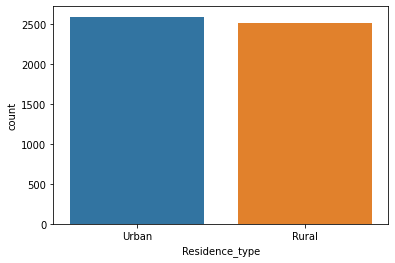

In [ ]:
sns.countplot(df['Residence_type'])

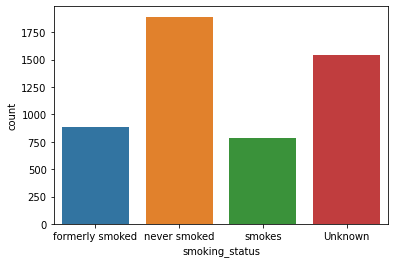

In [ ]:
sns.countplot(df['smoking_status'])

### **Relation between Categorical column and Target columns**

In [ ]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

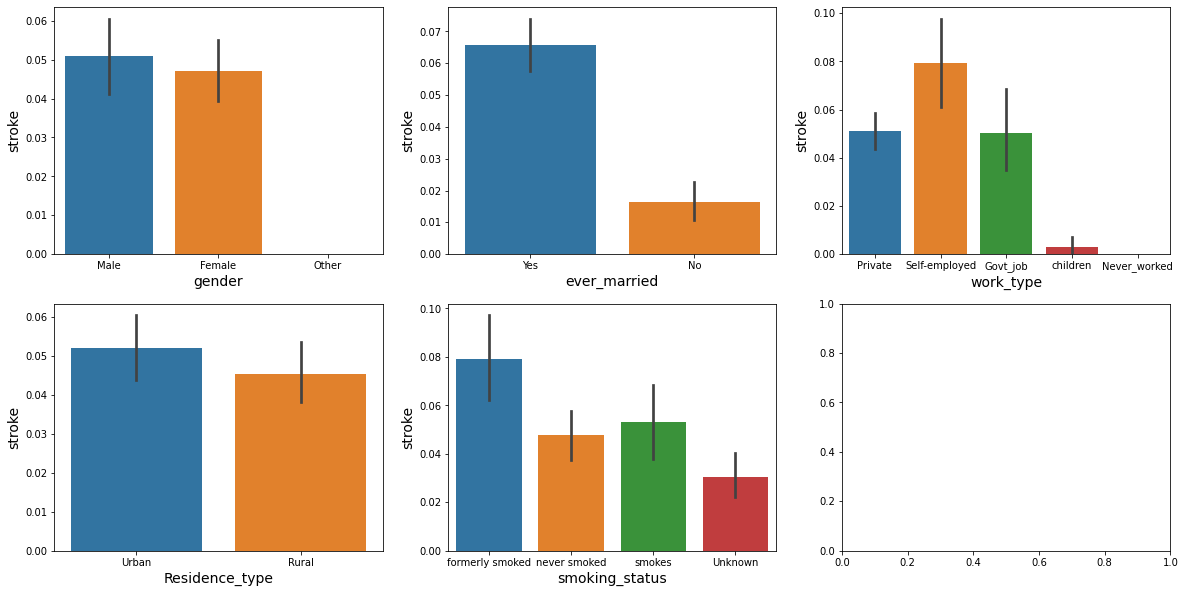

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    sns.barplot(df[c], df[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)

plt.show()

### **Correlation Heatmap**

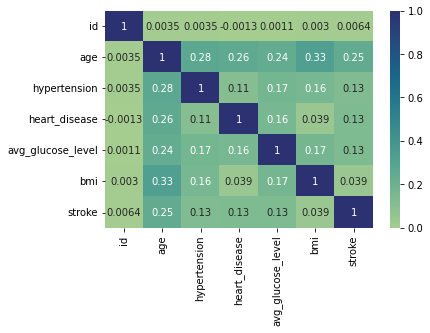

In [ ]:

sns.heatmap(df.corr(), annot = True, cmap = 'crest')

### **Checking Outliers**

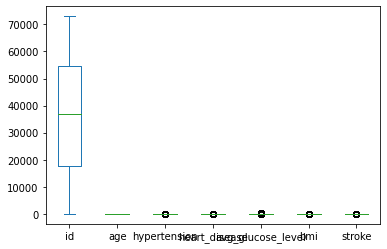

In [ ]:
df.plot(kind='box')
plt.show()

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [ ]:
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
from imblearn.over_sampling import SMOTE
X, y = df.iloc[:, 0:-1], df.iloc[:, -1:]

print("Before Oversampling label 1: ", y.value_counts()[1])
print("Before Oversampling label 0: ", y.value_counts()[0])

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print("After Oversampling label 1: ", y.value_counts()[1])
print("After Oversampling label 0: ", y.value_counts()[0])

Before Oversampling label 1:  249
Before Oversampling label 0:  4861
After Oversampling label 1:  4861
After Oversampling label 0:  4861


### **Visualization**

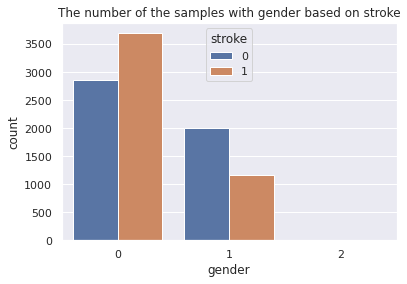

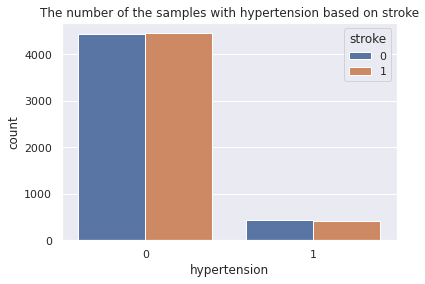

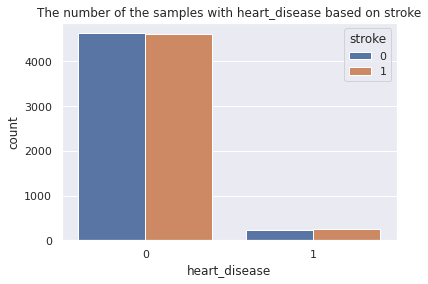

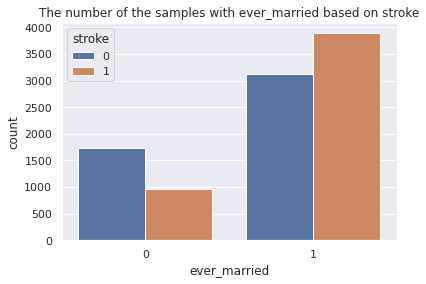

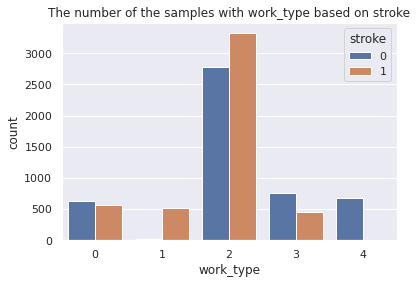

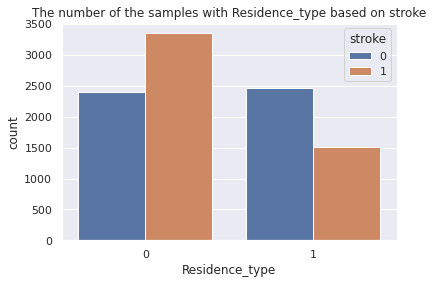

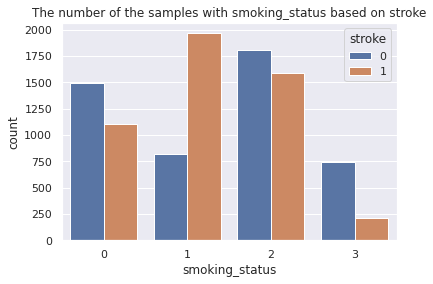

In [ ]:
df_as = pd.concat([X, y], axis = 1)

sns.set_theme(style = 'darkgrid')
for i in df_as.columns[:-1]:  # exclude stroke column
    if (df_as[i].dtype == 'object') or (df_as[i].dtype == 'int64'):
            sns.countplot(data = df_as, x = i, hue = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


### **Splitting the data for train and test**

In [ ]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3897,1,4.00,0,0,0,4,0,90.42,16.2,0
576,1,29.00,0,0,0,2,1,207.58,22.8,3
4013,1,44.00,1,0,1,2,0,91.28,26.5,2
4536,0,68.00,1,0,1,2,1,150.74,40.3,0
1180,0,62.00,0,0,1,2,0,82.57,36.0,1
...,...,...,...,...,...,...,...,...,...,...
4426,1,43.00,0,0,1,0,0,88.00,30.6,2
466,0,61.00,1,0,1,2,0,170.05,60.2,3
3092,0,1.16,0,0,0,4,1,97.28,17.8,0
3772,1,80.00,0,0,1,3,0,196.08,31.0,1


In [ ]:
y_train

3897    0
576     0
4013    0
4536    0
1180    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 3577, dtype: int64

In [ ]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,31.0,0,0,0,3,0,64.85,23.0,0
4478,1,40.0,0,0,1,3,0,65.29,28.3,2
3849,0,8.0,0,0,0,4,1,74.42,22.5,0
4355,0,79.0,1,0,1,3,0,76.64,19.5,2
3826,0,75.0,0,0,1,0,0,94.77,27.2,2
...,...,...,...,...,...,...,...,...,...,...
818,1,20.0,0,0,0,0,0,106.97,27.9,1
4829,1,66.0,0,0,1,2,0,67.92,31.1,1
611,1,42.0,0,0,1,0,1,93.79,27.2,2
3082,0,57.0,0,0,1,2,0,69.40,24.0,0


In [ ]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
818     0
4829    0
611     0
3082    0
3407    0
Name: stroke, Length: 1533, dtype: int64

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [ ]:
X_train

array([[ 1.18418048, -1.7467638 , -0.31719928, ..., -0.340693  ,
        -1.65003512, -1.29622579],
       [ 1.18418048, -0.63635252, -0.31719928, ...,  2.26654137,
        -0.79238754,  1.52066342],
       [ 1.18418048,  0.02989425,  3.15259225, ..., -0.32155489,
        -0.31158512,  0.58170035],
       ...,
       [-0.84446587, -1.87290652, -0.31719928, ..., -0.18803315,
        -1.44212056, -1.29622579],
       [ 1.18418048,  1.62888649, -0.31719928, ...,  2.01062472,
         0.27317459, -0.35726272],
       [-0.84446587,  0.11872715, -0.31719928, ..., -0.12416526,
         2.78114402,  1.52066342]])

In [ ]:
X_test

array([[ 1.18418048, -0.54751962, -0.31719928, ..., -0.90971812,
        -0.76639822, -1.29622579],
       [ 1.18418048, -0.14777156, -0.31719928, ..., -0.89992653,
        -0.07768123,  0.58170035],
       [-0.84446587, -1.569098  , -0.31719928, ..., -0.69675096,
        -0.83137152, -1.29622579],
       ...,
       [ 1.18418048, -0.05893866, -0.31719928, ..., -0.26569829,
        -0.22062249,  0.58170035],
       [-0.84446587,  0.60730811, -0.31719928, ..., -0.80846414,
        -0.63645162, -1.29622579],
       [-0.84446587,  0.74055746, -0.31719928, ..., -0.72746095,
        -0.46752104,  0.58170035]])

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Model Training**

Logistic Regression
Validation Accuracy:  0.9419439008480104
Training Accuracy:  0.9552697791445345


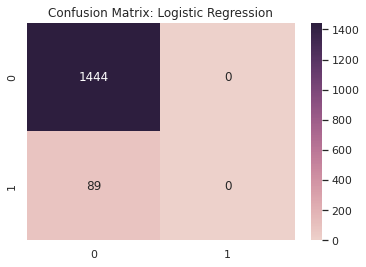

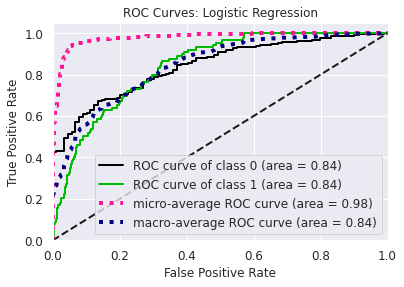

Random Forest
Validation Accuracy:  0.9412915851272016
Training Accuracy:  1.0


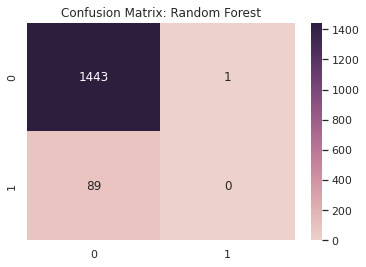

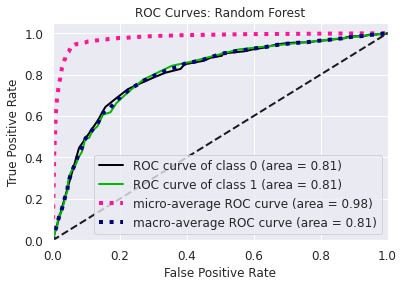

KNN
Validation Accuracy:  0.9406392694063926
Training Accuracy:  0.9575062901873078


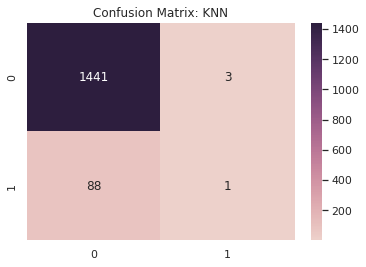

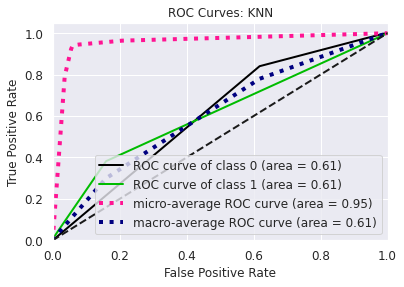

In [ ]:
models = [('Logistic Regression', LogisticRegression()),
          ('Random Forest', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier())]

models_score = []
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    model.predict(X_test)
    models_score.append([name, accuracy_score(y_test, model.predict(X_test))])
    
    print(name)
    print('Validation Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))
    
    plt.figure()
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    plt.title('Confusion Matrix: {}'.format(name))
    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()
    
    import scikitplot as skplt

    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    plt.title('ROC Curves: {}'.format(name))
    plt.show()

### **Tuning of Hyperparameter**

In [ ]:
grid_models = [(LogisticRegression(),[{'C' : [0.3, 0.7, 1], 'random_state' : [42]}]),
               (RandomForestClassifier(),[{'n_estimators' : [100, 200, 300], 'criterion' : ['gini','entropy'], 'random_state' : [42]}]),
               (KNeighborsClassifier(),[{'n_neighbors' : [4, 6, 8, 10], 'metric' : ['euclidean', 'manhattan', 'chebyshev','minkowski']}])]

In [ ]:
for model, param_grid  in grid_models:
    cv = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = 5)
    cv.fit(X_train, y_train)
    best_accuracy = cv.best_score_
    best_params = cv.best_params_
    print('{}: \nBest Accuracy: {:.2f}%'.format(model, best_accuracy*100))
    print('Best Parameters: ',best_params)
    print('******************************')

LogisticRegression(): 
Best Accuracy: 95.53%
Best Parameters:  {'C': 0.3, 'random_state': 42}
******************************
RandomForestClassifier(): 
Best Accuracy: 95.55%
Best Parameters:  {'criterion': 'entropy', 'n_estimators': 300, 'random_state': 42}
******************************
KNeighborsClassifier(): 
Best Accuracy: 95.55%
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 4}
******************************
